### EDA

## IMPORTAR LIBRERÍAS

In [34]:
#Librerías para tratamiento de datos
import pandas as pd
import numpy as np

#Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

#Librerías para manejo de alertas
import warnings

In [35]:
#Configuración de gráficos y alertas

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16,9)

In [90]:
#Carga de datos

datos = pd.read_csv('https://raw.githubusercontent.com/toneloy/data/master/iris.csv')

In [62]:
#Visualización inicial de datos por Head.

datos.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
#Visualización inicial de datos - Finalización.

datos.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [65]:
#Métricas de estadística descriptiva -para variables numéricas.

datos.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
#Tipología de datos y cantidad de datos.

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
#Métricas de estadística descriptiva para variables categóricas o tipo Object.

datos.describe(include = 'object')

,species
count,150
unique,3
top,setosa
freq,50


In [42]:
#datos = pd.read_csv('2. Creditos.csv', sep = ";")

# VISUALIZACIÓN GRÁFICA DE DATOS

En primer lugar realizamos un diagrama circular, para esto se deben de agrupar los datos por frecuencia.

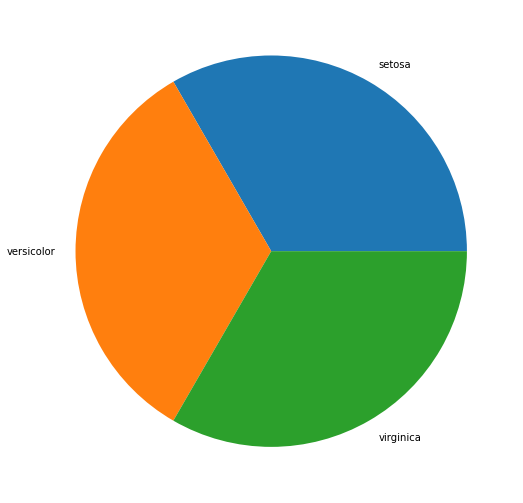

In [51]:
frecuencia = datos.groupby('species').agg(frecuency = ('species','count'))
plt.pie(frecuencia['frecuency'],labels = frecuencia.index)
plt.show()

En segundo lugar, realizamos un diagrama de dispersión básico para revisar cómo se relacionan 2 variables entre sí.

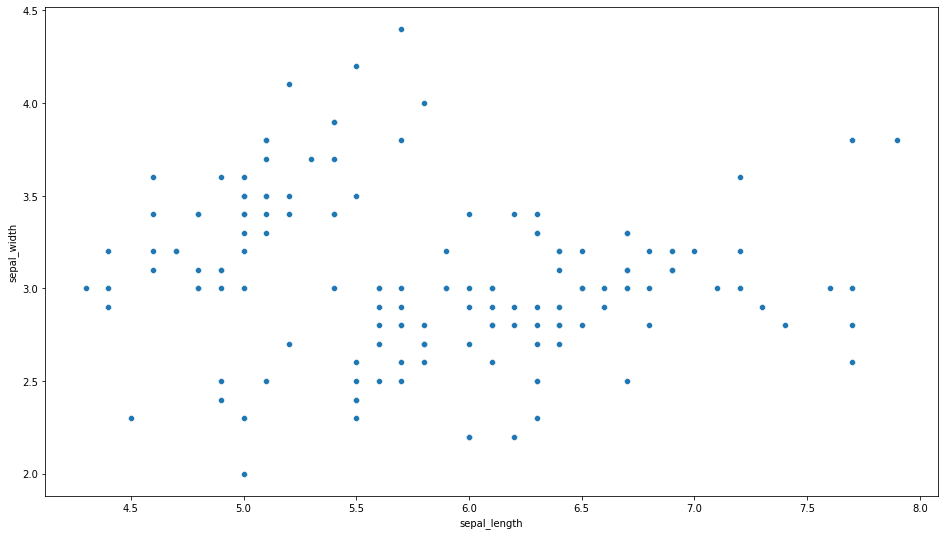

In [43]:
sb.scatterplot(data = datos, x = 'sepal_length', y = 'sepal_width')
plt.show()

Especificamos o agrupamos por la variable categórica.

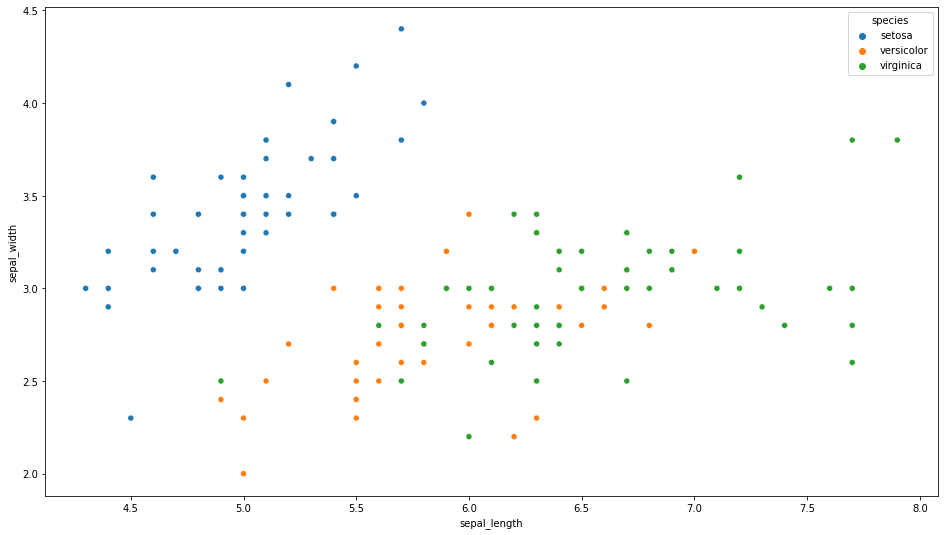

In [44]:
sb.scatterplot(data = datos, x = 'sepal_length', y = 'sepal_width', hue = datos.species)
plt.show()

Cambiamos el estilo según el tipo de dato.

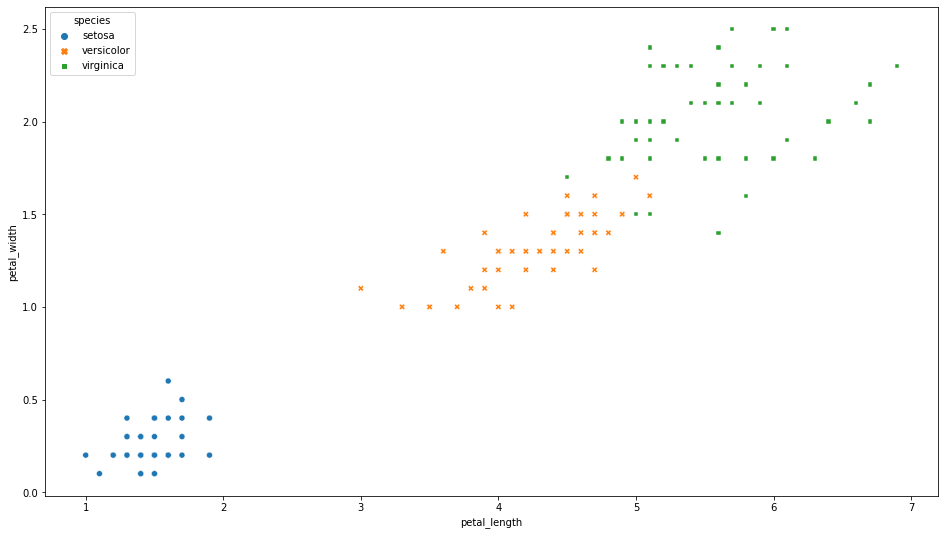

In [45]:
sb.scatterplot(data = datos, x = 'petal_length', y = 'petal_width', hue = datos.species, style = datos.species)
plt.show()

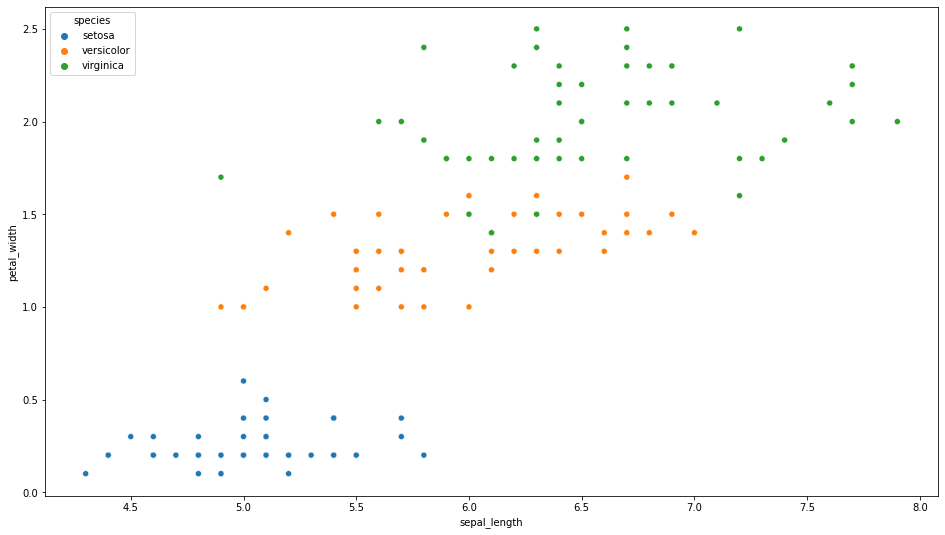

In [46]:
sb.scatterplot(data = datos, x = 'sepal_length', y = 'petal_width', hue = datos.species)
plt.show()

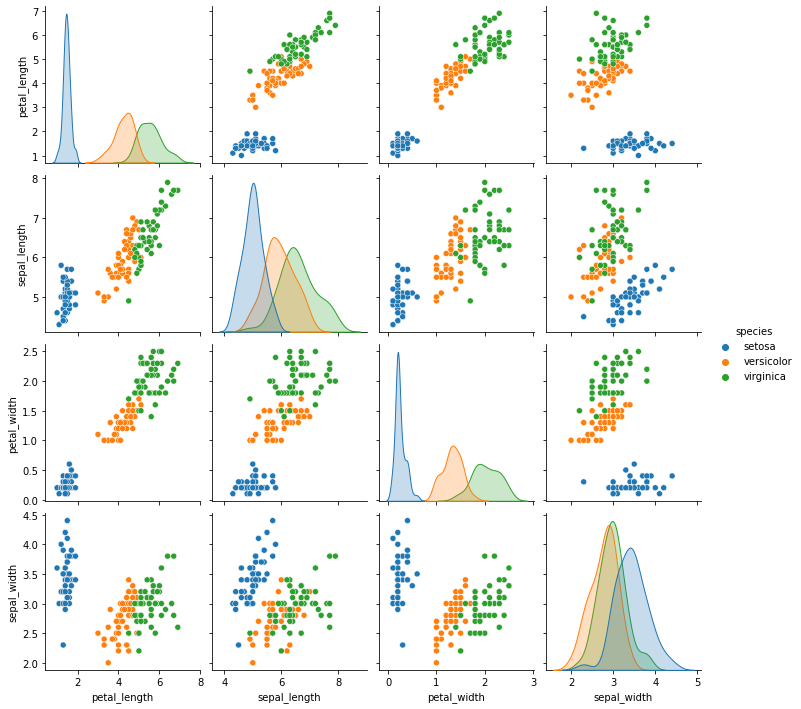

In [ ]:
sb.pairplot(data = datos, vars = ['petal_length','sepal_length','petal_width','sepal_width'], hue = 'species')
plt.show()

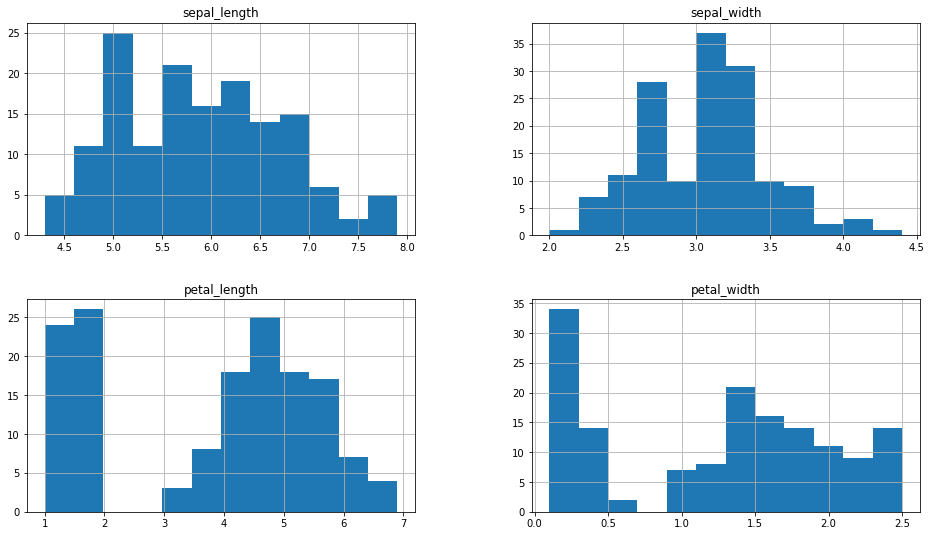

In [73]:
datos.hist(bins = 12)
plt.show()

Hago el mismo ejercicio, borrando los datos pertenecientes a una de las categorías.

In [91]:
dbor = datos[datos.species != "setosa"]

In [92]:
dbor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000
std,0.662834,0.332751,0.825578,0.424769
min,4.900000,2.000000,3.000000,1.000000
25%,5.800000,2.700000,4.375000,1.300000
50%,6.300000,2.900000,4.900000,1.600000
75%,6.700000,3.025000,5.525000,2.000000
max,7.900000,3.800000,6.900000,2.500000


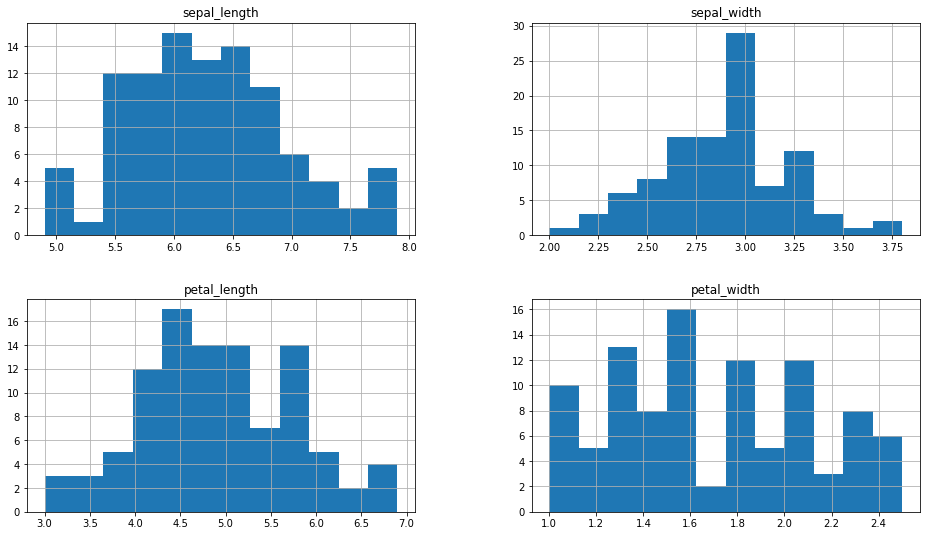

In [85]:
dbor.hist(bins = 12)
plt.show()

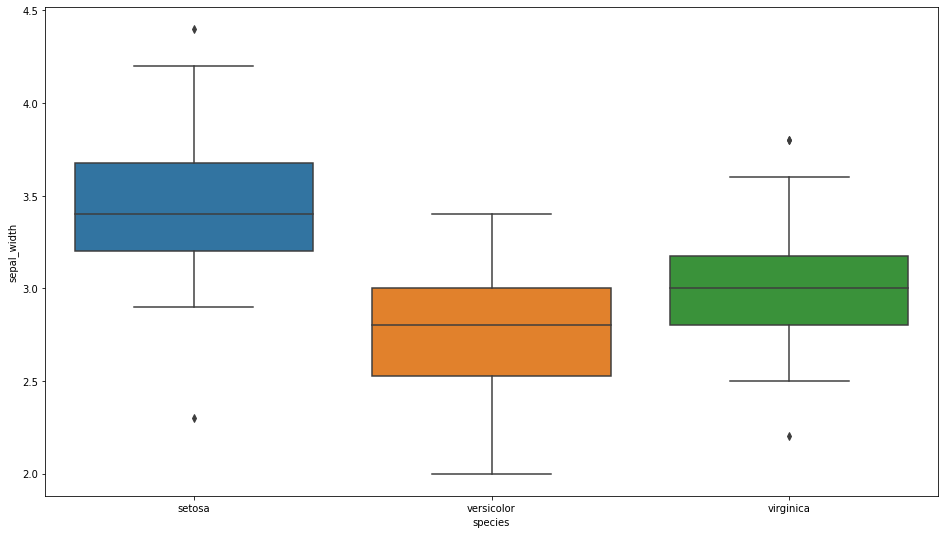

In [96]:
sb.boxplot(x = datos.species, y = datos.sepal_width)
plt.show()

In [128]:
datos.iloc[datos["sepal_width"].idxmax()]

sepal_length       5.7
sepal_width        4.4
petal_length       1.5
petal_width        0.4
species         setosa
Name: 15, dtype: object

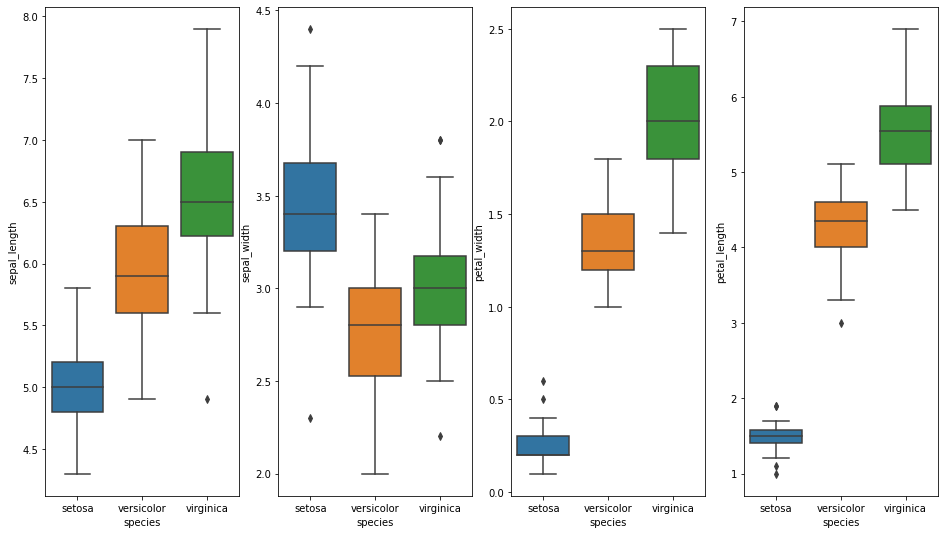

In [129]:
fig, ax = plt.subplots(1,4)
sb.boxplot(x = datos.species, y = datos.sepal_length, ax = ax[0])
sb.boxplot(x = datos.species, y = datos.sepal_width, ax = ax[1])
sb.boxplot(x = datos.species, y = datos.petal_width, ax = ax[2])
sb.boxplot(x = datos.species, y = datos.petal_length, ax = ax[3])
plt.show()

Finalmente, hayo la correlación para hacer un análisis bivariable; la idea es poder detectar insights referentes a la relación entre las variables del dataframe.

In [107]:
correlacion = datos.corr()
correlacion

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


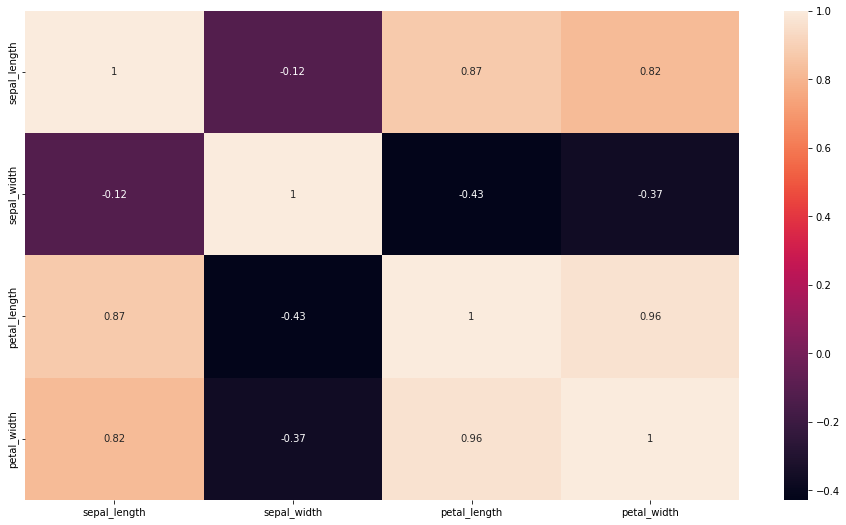

In [108]:
sb.heatmap(correlacion, annot = True)
plt.show()